# CODING TASK #1: IMPORT LIBRARIES/DATASETS AND PERFORM BASIC EDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0"
!pip install autogluon --no-cache-dir

  Using cached pip-22.1-py3-none-any.whl (2.1 MB)
  Attempting uninstall: pip
    Found existing installation: pip 21.3.1
    Uninstalling pip-21.3.1:
      Successfully uninstalled pip-21.3.1
  Using cached setuptools-62.2.0-py3-none-any.whl (1.1 MB)
  Using cached wheel-0.37.1-py2.py3-none-any.whl (35 kB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 59.4.0
    Uninstalling setuptools-59.4.0:
      Successfully uninstalled setuptools-59.4.0
  Using cached mxnet-1.9.0-py3-none-manylinux2014_x86_64.whl (47.3 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 98.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 209.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.2/188.2 kB 221.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 267.0/267.0 kB 221.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.6/48.6 kB 162.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
# pip install autogluon autogluon.tabular "mxnet<2.0.0"

In [4]:
# AutoGluon is modularized into sub-modules for: 1. Tabular, 2. text, 3.Images
from autogluon.tabular import TabularDataset, TabularPredictor

/usr/local/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
bike_df = pd.read_csv('bike_sharing_daily.csv')

In [6]:
bike_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,331,654,985
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,131,670,801
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,120,1229,1349
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,108,1454,1562
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,12/27/2012,1,1,12,0,4,1,2,0.254167,0.652917,0.350133,247,1867,2114
727,728,12/28/2012,1,1,12,0,5,1,2,0.253333,0.590000,0.155471,644,2451,3095
728,729,12/29/2012,1,1,12,0,6,0,2,0.253333,0.752917,0.124383,159,1182,1341
729,730,12/30/2012,1,1,12,0,0,0,1,0.255833,0.483333,0.350754,364,1432,1796


In [7]:
# Explore the first five rows in the DataFrame
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,331,654,985
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,131,670,801
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,120,1229,1349
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,108,1454,1562
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,82,1518,1600


In [8]:
# Explore the last five rows in the DataFrame
bike_df.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
726,727,12/27/2012,1,1,12,0,4,1,2,0.254167,0.652917,0.350133,247,1867,2114
727,728,12/28/2012,1,1,12,0,5,1,2,0.253333,0.590000,0.155471,644,2451,3095
728,729,12/29/2012,1,1,12,0,6,0,2,0.253333,0.752917,0.124383,159,1182,1341
729,730,12/30/2012,1,1,12,0,0,0,1,0.255833,0.483333,0.350754,364,1432,1796
730,731,12/31/2012,1,1,12,0,1,1,2,0.215833,0.577500,0.154846,439,2290,2729


In [9]:
# Generate statistical summary
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [10]:
# Obtain dataset information
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  hum         731 non-null    float64
 11  windspeed   731 non-null    float64
 12  casual      731 non-null    int64  
 13  registered  731 non-null    int64  
 14  cnt         731 non-null    int64  
dtypes: float64(3), int64(11), object(1)
memory usage: 85.8+ KB


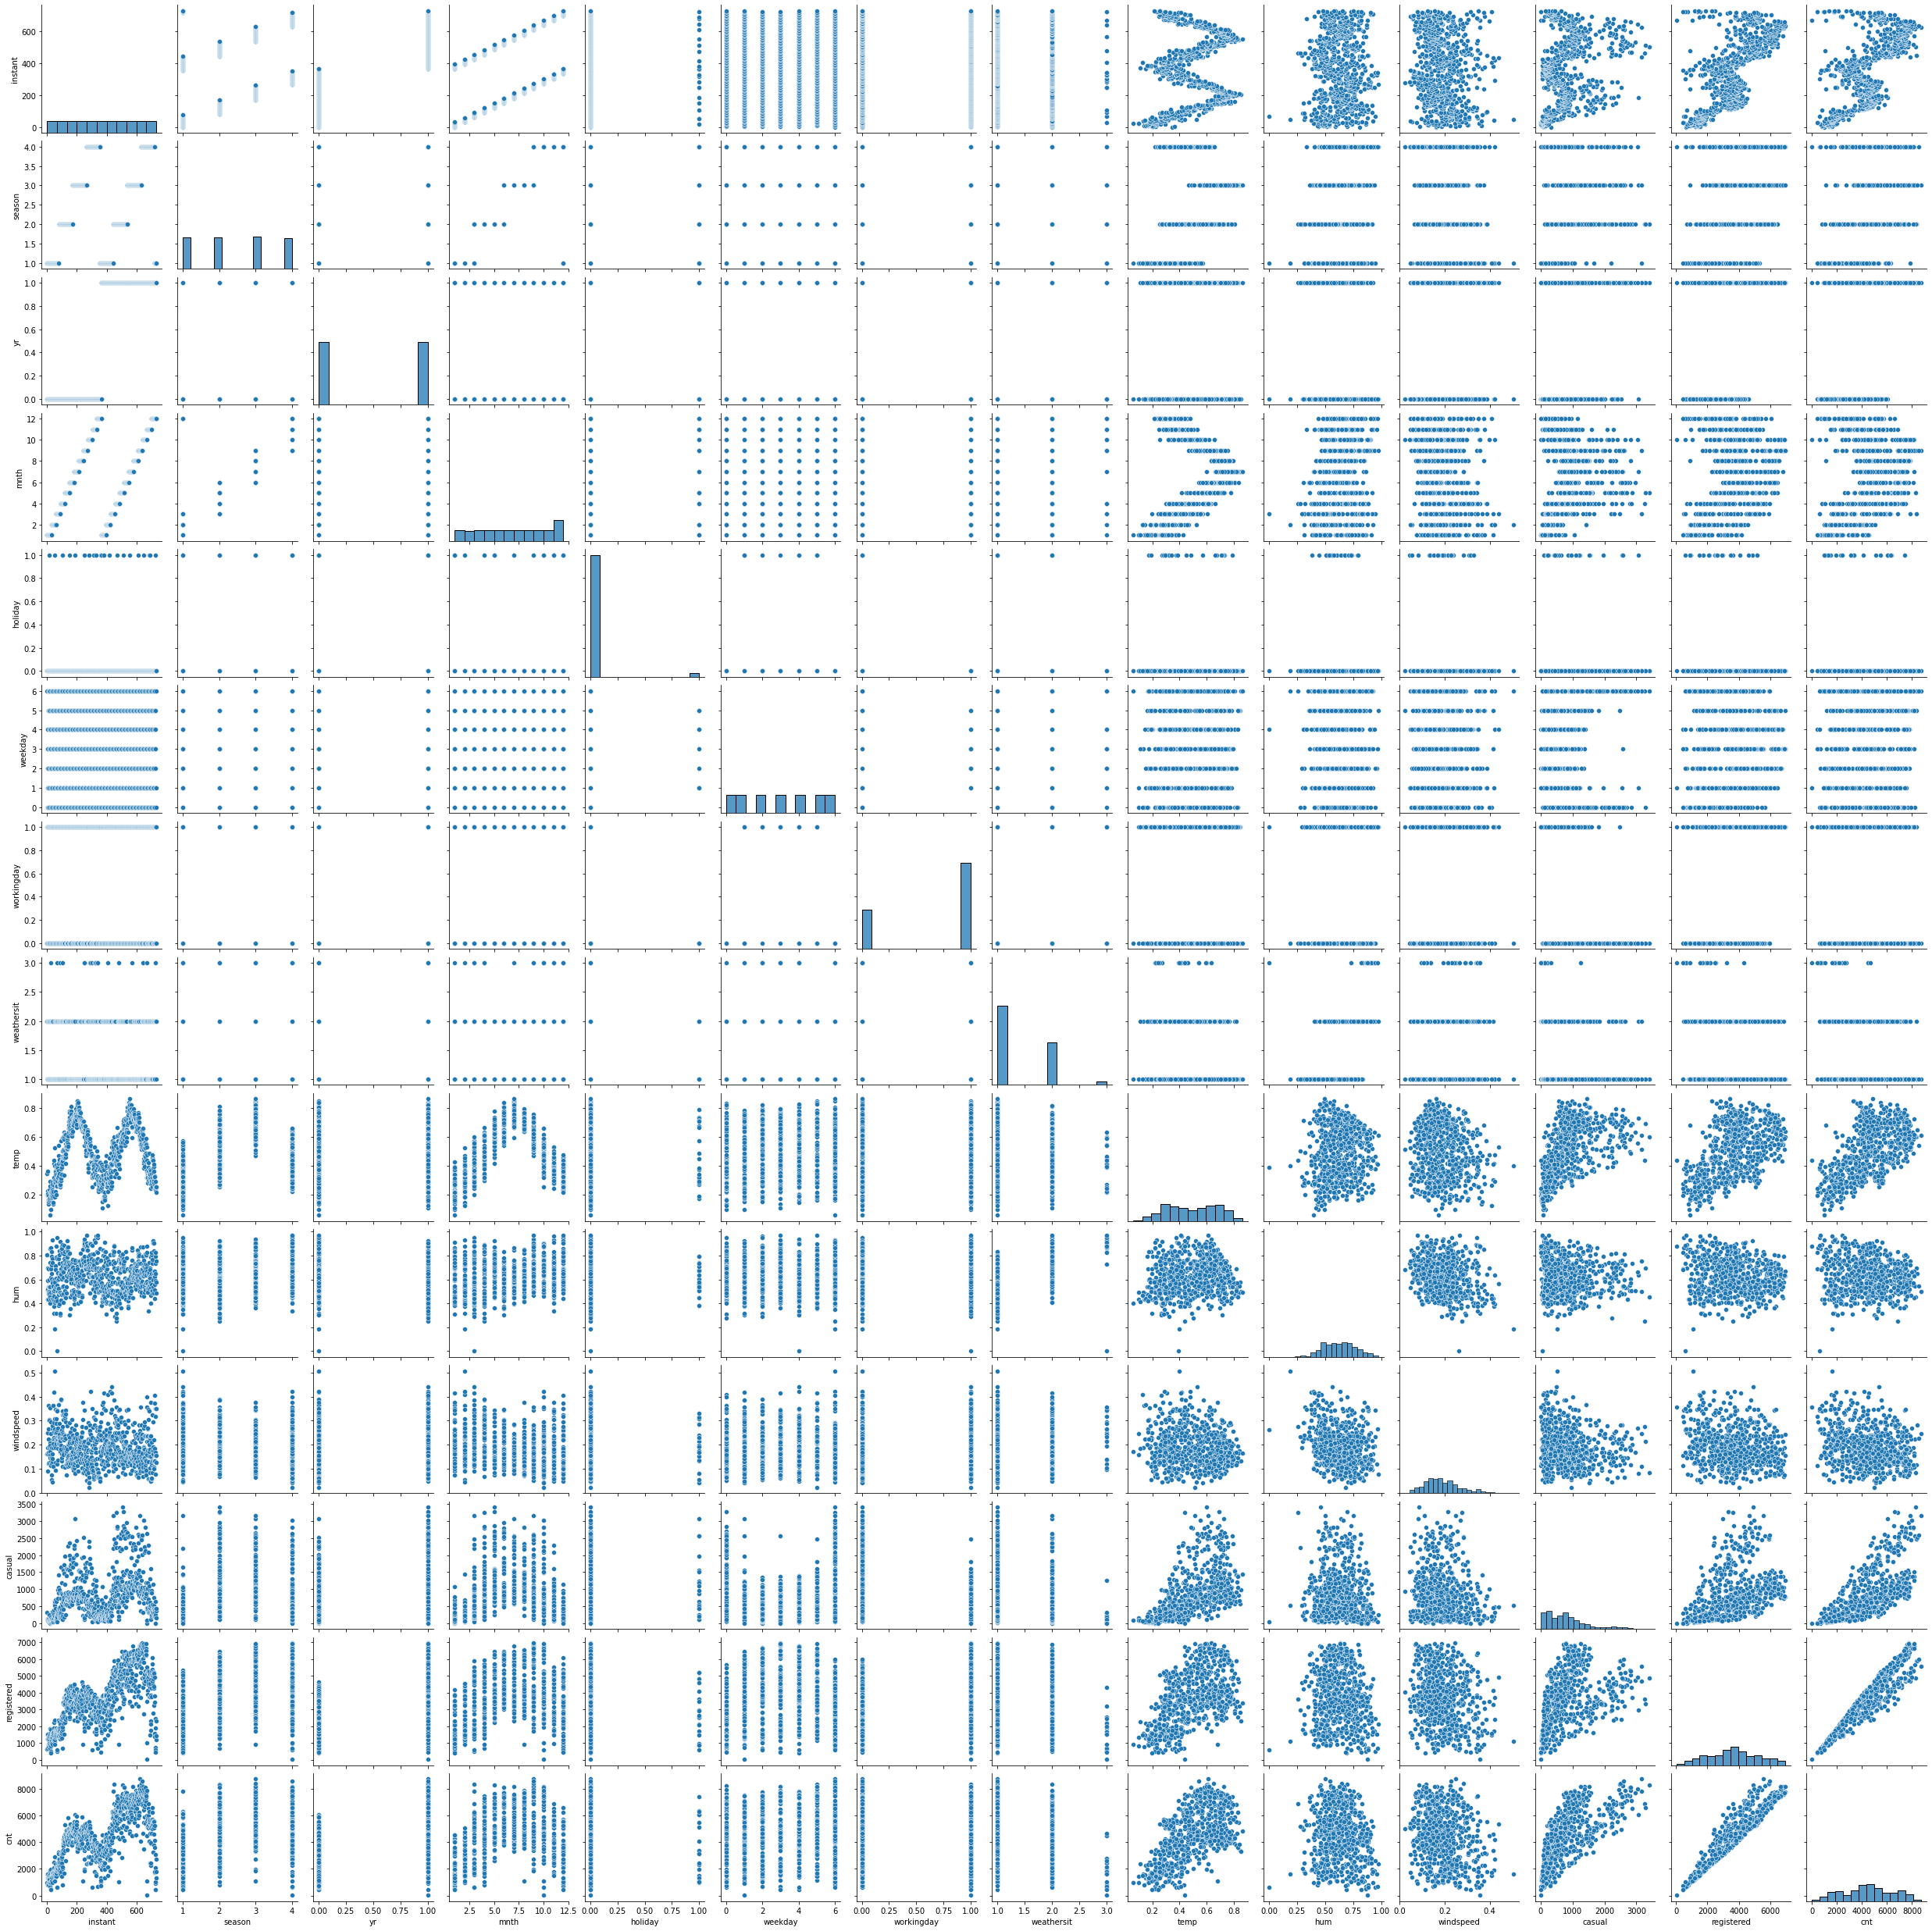

In [11]:
# plot pairplot
sns.pairplot(bike_df);

# CODING TASK #2: TRAIN/EVALUATE MULTIPLE REGRESSION MODELS USING AUTOGLUON ((METRIC: R2, PRESETS: BEST QUALITY))

In [12]:
bike_df.drop(['registered', 'cnt', 'instant', 'dteday'], inplace = True, axis = 1)

In [13]:
# Split the data into 80% for training and 20% for testing using train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(bike_df, test_size=0.2, random_state=0)

In [14]:
X_train

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual
97,2,0,4,0,5,1,2,0.335833,0.836250,0.226992,172
503,2,1,5,0,5,1,1,0.564167,0.523333,0.136817,1521
642,4,1,10,0,4,1,2,0.657500,0.722917,0.117546,891
498,2,1,5,0,0,0,1,0.612500,0.576250,0.225117,2172
303,4,0,10,0,1,1,1,0.340000,0.703333,0.106350,362
...,...,...,...,...,...,...,...,...,...,...,...
707,4,1,12,0,6,0,2,0.381667,0.911250,0.101379,1153
192,3,0,7,0,2,1,1,0.794167,0.559167,0.200254,662
629,3,1,9,0,5,1,1,0.599167,0.668750,0.154229,1250
559,3,1,7,0,5,1,2,0.731667,0.485833,0.080850,1511


In [15]:
X_test

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual
196,3,0,7,0,6,0,1,0.686667,0.585000,0.208342,2418
187,3,0,7,0,4,1,1,0.750000,0.651250,0.159200,754
14,1,0,1,0,6,0,2,0.233333,0.498750,0.157963,222
31,1,0,2,0,2,1,2,0.192174,0.829565,0.053213,47
390,1,1,1,0,4,1,2,0.341667,0.769583,0.073396,244
...,...,...,...,...,...,...,...,...,...,...,...
566,3,1,7,0,5,1,2,0.665833,0.844167,0.208967,747
688,4,1,11,0,1,1,2,0.380833,0.623333,0.235067,449
266,4,0,9,0,6,0,2,0.606667,0.862500,0.078383,1776
504,2,1,5,0,6,0,1,0.600000,0.456250,0.083975,3410


In [16]:
# Train multiple ML Regression models using AutoGluon
# You need to specify the target column, train_data, limit_time, and presets 
# Note that AutoGluon automatically detects if the problem is classification or regression type problems from the 'label' column
# For regression type problems, 'label' values are generally floating point non-integers with large number of unique values

predictor = TabularPredictor(label = "casual", problem_type = 'regression', eval_metric = 'r2').fit(train_data = X_train, time_limit = 200, presets = "best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20220514_192159/"
Presets specified: ['best_quality']
Beginning AutoGluon training ... Time limit = 200s
AutoGluon will save models to "AutogluonModels/ag-20220514_192159/"
AutoGluon Version:  0.4.0
Python Version:     3.7.10
Operating System:   Linux
Train Data Rows:    584
Train Data Columns: 10
Label Column: casual
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    2881.6 MB
	Train Data (Original)  Memory Usage: 0.05 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 3 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFe

In [17]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                    model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0     WeightedEnsemble_L2   0.851747       0.159609  56.390899                0.000599           0.465321            2       True         10
1         CatBoost_BAG_L1   0.844732       0.021194  15.900867                0.021194          15.900867            1       True          5
2       LightGBMXT_BAG_L1   0.842214       0.041471  11.260067                0.041471          11.260067            1       True          3
3   NeuralNetTorch_BAG_L1   0.827885       0.050501  17.623236                0.050501          17.623236            1       True          8
4         LightGBM_BAG_L1   0.824676       0.036475  10.686843                0.036475          10.686843            1       True          4
5    LightGBMLarge_BAG_L1   0.816326       0.139449  18.365200                0.139449      

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'NeuralNetTorch_BAG_L1': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'LightGBMLarge_BAG_L1': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': 0.6565100715854191,
  'KNeighborsDist_BAG_L1': 0.6093214275254359,
  'LightGBMXT_BAG_L1': 0.8422137032313775,
  'LightGBM_BAG_L1': 0.8246758946365543,
  'CatBoost_BAG_L1': 0.8447321188316947,
  'NeuralNetFastAI_BAG_L1': 0.7701465092085152,
  'XGBoost_BAG_L1': 0.8048432987075095,
  'NeuralNetTorch_BAG_L1': 0.8278851430901294,
  'LightGBMLarge_BAG_L1': 0.8163255181903615,
  

In [18]:
predictor.leaderboard()

                    model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0     WeightedEnsemble_L2   0.851747       0.159609  56.390899                0.000599           0.465321            2       True         10
1         CatBoost_BAG_L1   0.844732       0.021194  15.900867                0.021194          15.900867            1       True          5
2       LightGBMXT_BAG_L1   0.842214       0.041471  11.260067                0.041471          11.260067            1       True          3
3   NeuralNetTorch_BAG_L1   0.827885       0.050501  17.623236                0.050501          17.623236            1       True          8
4         LightGBM_BAG_L1   0.824676       0.036475  10.686843                0.036475          10.686843            1       True          4
5    LightGBMLarge_BAG_L1   0.816326       0.139449  18.365200                0.139449          18.365200            1       True          9
6          XG

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,0.851747,0.159609,56.390899,0.000599,0.465321,2,True,10
1,CatBoost_BAG_L1,0.844732,0.021194,15.900867,0.021194,15.900867,1,True,5
2,LightGBMXT_BAG_L1,0.842214,0.041471,11.260067,0.041471,11.260067,1,True,3
3,NeuralNetTorch_BAG_L1,0.827885,0.050501,17.623236,0.050501,17.623236,1,True,8
4,LightGBM_BAG_L1,0.824676,0.036475,10.686843,0.036475,10.686843,1,True,4
5,LightGBMLarge_BAG_L1,0.816326,0.139449,18.365200,0.139449,18.365200,1,True,9
6,XGBoost_BAG_L1,0.804843,0.045845,11.141408,0.045845,11.141408,1,True,7
7,NeuralNetFastAI_BAG_L1,0.770147,0.101270,16.186203,0.101270,16.186203,1,True,6
8,KNeighborsUnif_BAG_L1,0.656510,0.105187,0.005986,0.105187,0.005986,1,True,1
9,KNeighborsDist_BAG_L1,0.609321,0.101675,0.004748,0.101675,0.004748,1,True,2


                    model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0     WeightedEnsemble_L2   0.851747       0.159609  56.390899                0.000599           0.465321            2       True         10
1         CatBoost_BAG_L1   0.844732       0.021194  15.900867                0.021194          15.900867            1       True          5
2       LightGBMXT_BAG_L1   0.842214       0.041471  11.260067                0.041471          11.260067            1       True          3
3   NeuralNetTorch_BAG_L1   0.827885       0.050501  17.623236                0.050501          17.623236            1       True          8
4         LightGBM_BAG_L1   0.824676       0.036475  10.686843                0.036475          10.686843            1       True          4
5    LightGBMLarge_BAG_L1   0.816326       0.139449  18.365200                0.139449          18.365200            1       True          9
6          XG

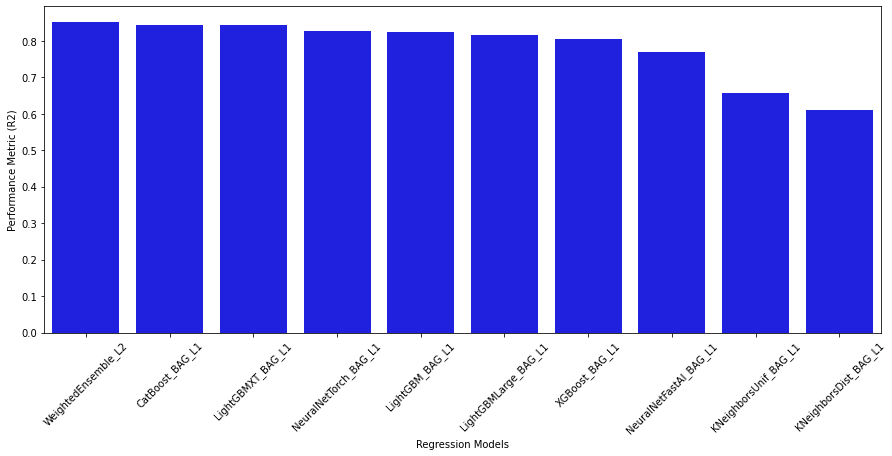

In [19]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize = (15, 6))
sns.barplot(x = "model", y = "score_val", data = predictor.leaderboard(), color = "b")
ax.set(ylabel = "Performance Metric (R2)", xlabel = "Regression Models")
plt.xticks(rotation = 45);


In [20]:
predictor.evaluate(X_test)

Evaluation: r2 on test data: 0.8797139356963792
Evaluations on test data:
{
    "r2": 0.8797139356963792,
    "root_mean_squared_error": -252.10995271120268,
    "mean_squared_error": -63559.42825604485,
    "mean_absolute_error": -165.6636921889117,
    "pearsonr": 0.9411193208366362,
    "median_absolute_error": -104.973388671875
}


{'r2': 0.8797139356963792,
 'root_mean_squared_error': -252.10995271120268,
 'mean_squared_error': -63559.42825604485,
 'mean_absolute_error': -165.6636921889117,
 'pearsonr': 0.9411193208366362,
 'median_absolute_error': -104.973388671875}

In [21]:
# assess model performance
# Pick 5 test datasets and generate predictions
y_pred = predictor.predict(X_test)
print("Predictions:  ", list(y_pred)[:])

Predictions:   [2036.331298828125, 773.0463256835938, 206.17218017578125, 111.49085235595703, 238.72225952148438, 149.83209228515625, 336.6490478515625, 604.9287109375, 2067.035888671875, 136.79574584960938, 55.428627014160156, 148.90965270996094, 181.70545959472656, 814.4957275390625, 801.7752075195312, 702.3472290039062, 1078.993408203125, 1758.489013671875, 143.5892791748047, 345.3546447753906, 1212.181396484375, 528.3656005859375, 392.8095703125, 1833.666015625, 229.65277099609375, 2245.443115234375, 737.6807861328125, 829.85400390625, 2205.14794921875, 2595.47607421875, 160.107666015625, 782.8802490234375, 412.1767578125, 2068.9765625, 365.4225158691406, 654.0198974609375, 966.41455078125, 1999.3585205078125, 338.9857177734375, 210.44345092773438, 2379.64013671875, 584.9605712890625, 668.8694458007812, 373.2625427246094, 1045.02734375, 1004.494873046875, 262.315185546875, 1521.1539306640625, 560.5986328125, 576.973388671875, 2071.428466796875, 1053.986328125, 651.7467651367188, 90

In [22]:
y_test = X_test['casual']
y_test

196    2418
187     754
14      222
31       47
390     244
       ... 
566     747
688     449
266    1776
504    3410
239    1415
Name: casual, Length: 147, dtype: int64

Text(0, 0.5, 'True Values')

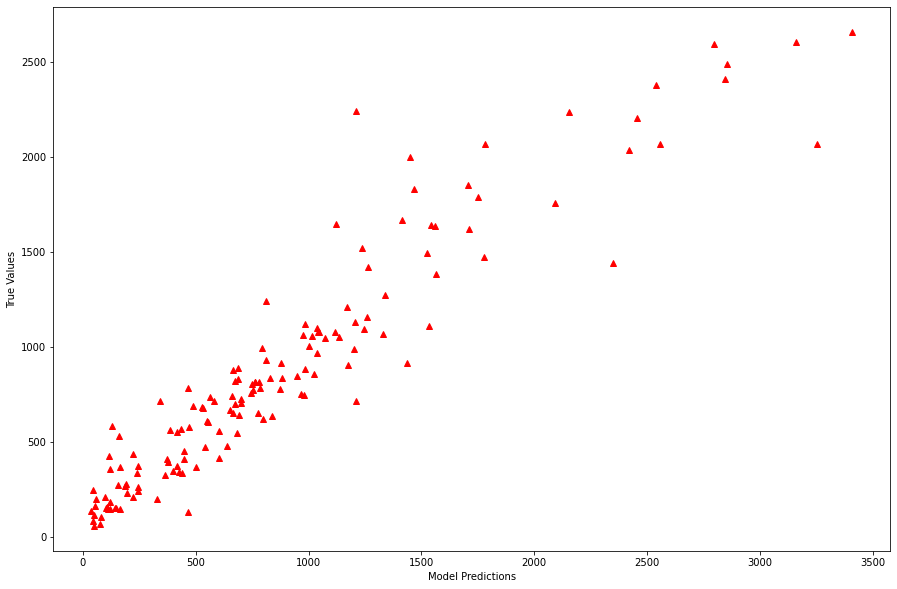

In [23]:
y_predict = predictor.predict(X_test)
plt.figure(figsize = (15, 10))
plt.plot(y_test, y_predict, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')


In [24]:
k = X_test.shape[1]
n = len(X_test)
n

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)),'.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

RMSE = 252.11 
MSE = 63559.42825604485 
MAE = 165.6636921889117 
R2 = 0.8797139356963792 
Adjusted R2 = 0.8699128489753435


# CODING TASK #3: TRAIN/EVALUATE REGRESSION MODELS USING AUTOGLUON (METRIC: RMSE, PRESETS: OPTIMIZED FOR DEPLOYMENT)

In [25]:
predictor = TabularPredictor(label="casual", problem_type = 'regression', eval_metric = 'rmse').fit(train_data = X_train, time_limit = 300, presets = "optimize_for_deployment")
predictor.fit_summary()
predictor.leaderboard()

No path specified. Models will be saved in: "AutogluonModels/ag-20220514_192416/"
Presets specified: ['optimize_for_deployment']
Beginning AutoGluon training ... Time limit = 300s
AutoGluon will save models to "AutogluonModels/ag-20220514_192416/"
AutoGluon Version:  0.4.0
Python Version:     3.7.10
Operating System:   Linux
Train Data Rows:    584
Train Data Columns: 10
Label Column: casual
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    2696.26 MB
	Train Data (Original)  Memory Usage: 0.05 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 3 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fittin

*** Summary of fit() ***
Estimated performance of each model:
                 model   score_val  pred_time_val  fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  WeightedEnsemble_L2 -213.457477       0.233776  6.038336                0.000566           0.368440            2       True          7
1             CatBoost -234.305727       0.001634  0.884410                0.001634           0.884410            1       True          4
2       NeuralNetTorch -250.172204       0.009353  3.932702                0.009353           3.932702            1       True          6
3           LightGBMXT -253.193580       0.005961  0.301697                0.005961           0.301697            1       True          3
4              XGBoost -259.843126       0.006336  0.533907                0.006336           0.533907            1       True          5
5       KNeighborsUnif -297.234364       0.104101  0.010463                0.104101           0.010463        

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,-213.457477,0.233776,6.038336,0.000566,0.368440,2,True,7
1,CatBoost,-234.305727,0.001634,0.884410,0.001634,0.884410,1,True,4
2,NeuralNetTorch,-250.172204,0.009353,3.932702,0.009353,3.932702,1,True,6
3,LightGBMXT,-253.193580,0.005961,0.301697,0.005961,0.301697,1,True,3
4,XGBoost,-259.843126,0.006336,0.533907,0.006336,0.533907,1,True,5
5,KNeighborsUnif,-297.234364,0.104101,0.010463,0.104101,0.010463,1,True,1
6,KNeighborsDist,-348.752277,0.105826,0.006716,0.105826,0.006716,1,True,2


                 model   score_val  pred_time_val  fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  WeightedEnsemble_L2 -213.457477       0.233776  6.038336                0.000566           0.368440            2       True          7
1             CatBoost -234.305727       0.001634  0.884410                0.001634           0.884410            1       True          4
2       NeuralNetTorch -250.172204       0.009353  3.932702                0.009353           3.932702            1       True          6
3           LightGBMXT -253.193580       0.005961  0.301697                0.005961           0.301697            1       True          3
4              XGBoost -259.843126       0.006336  0.533907                0.006336           0.533907            1       True          5
5       KNeighborsUnif -297.234364       0.104101  0.010463                0.104101           0.010463            1       True          1
6       KNeighborsDist -348.752277

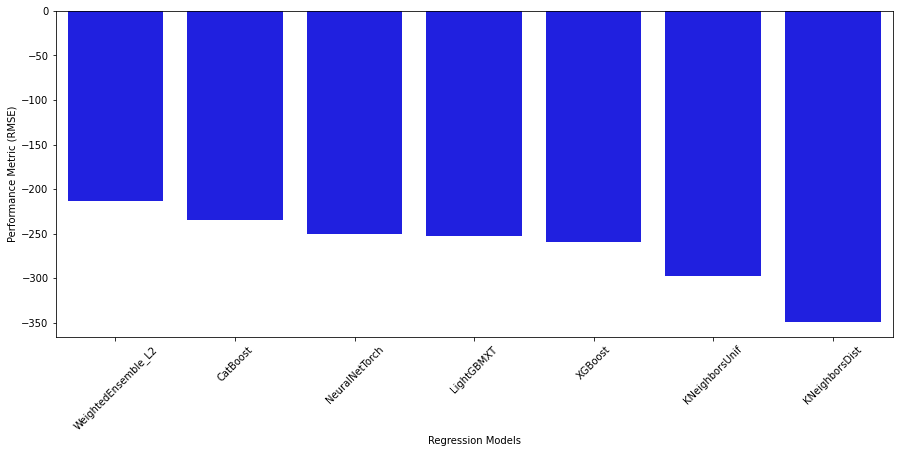

In [26]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize = (15, 6))
sns.barplot(x = "model", y = "score_val", data = predictor.leaderboard(), color = "b")
ax.set(ylabel = "Performance Metric (RMSE)", xlabel = "Regression Models")
plt.xticks(rotation = 45);


In [27]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                 model   score_val  pred_time_val  fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  WeightedEnsemble_L2 -213.457477       0.233776  6.038336                0.000566           0.368440            2       True          7
1             CatBoost -234.305727       0.001634  0.884410                0.001634           0.884410            1       True          4
2       NeuralNetTorch -250.172204       0.009353  3.932702                0.009353           3.932702            1       True          6
3           LightGBMXT -253.193580       0.005961  0.301697                0.005961           0.301697            1       True          3
4              XGBoost -259.843126       0.006336  0.533907                0.006336           0.533907            1       True          5
5       KNeighborsUnif -297.234364       0.104101  0.010463                0.104101           0.010463        

{'model_types': {'KNeighborsUnif': 'KNNModel',
  'KNeighborsDist': 'KNNModel',
  'LightGBMXT': 'LGBModel',
  'CatBoost': 'CatBoostModel',
  'XGBoost': 'XGBoostModel',
  'NeuralNetTorch': 'TabularNeuralNetTorchModel',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif': -297.23436379824767,
  'KNeighborsDist': -348.7522766383077,
  'LightGBMXT': -253.19358021548783,
  'CatBoost': -234.3057274736249,
  'XGBoost': -259.84312649037014,
  'NeuralNetTorch': -250.1722037120244,
  'WeightedEnsemble_L2': -213.4574770469993},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'KNeighborsUnif': 'AutogluonModels/ag-20220514_192416/models/KNeighborsUnif/',
  'KNeighborsDist': 'AutogluonModels/ag-20220514_192416/models/KNeighborsDist/',
  'LightGBMXT': 'AutogluonModels/ag-20220514_192416/models/LightGBMXT/',
  'CatBoost': 'AutogluonModels/ag-20220514_192416/models/CatBoost/',
  'XGBoost': 'AutogluonModels/ag-20220514_192416/models/XGBoost/',
  'NeuralNetTor

In [28]:
predictor.leaderboard()

                 model   score_val  pred_time_val  fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  WeightedEnsemble_L2 -213.457477       0.233776  6.038336                0.000566           0.368440            2       True          7
1             CatBoost -234.305727       0.001634  0.884410                0.001634           0.884410            1       True          4
2       NeuralNetTorch -250.172204       0.009353  3.932702                0.009353           3.932702            1       True          6
3           LightGBMXT -253.193580       0.005961  0.301697                0.005961           0.301697            1       True          3
4              XGBoost -259.843126       0.006336  0.533907                0.006336           0.533907            1       True          5
5       KNeighborsUnif -297.234364       0.104101  0.010463                0.104101           0.010463            1       True          1
6       KNeighborsDist -348.752277

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,-213.457477,0.233776,6.038336,0.000566,0.368440,2,True,7
1,CatBoost,-234.305727,0.001634,0.884410,0.001634,0.884410,1,True,4
2,NeuralNetTorch,-250.172204,0.009353,3.932702,0.009353,3.932702,1,True,6
3,LightGBMXT,-253.193580,0.005961,0.301697,0.005961,0.301697,1,True,3
4,XGBoost,-259.843126,0.006336,0.533907,0.006336,0.533907,1,True,5
5,KNeighborsUnif,-297.234364,0.104101,0.010463,0.104101,0.010463,1,True,1
6,KNeighborsDist,-348.752277,0.105826,0.006716,0.105826,0.006716,1,True,2


                 model   score_val  pred_time_val  fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  WeightedEnsemble_L2 -213.457477       0.233776  6.038336                0.000566           0.368440            2       True          7
1             CatBoost -234.305727       0.001634  0.884410                0.001634           0.884410            1       True          4
2       NeuralNetTorch -250.172204       0.009353  3.932702                0.009353           3.932702            1       True          6
3           LightGBMXT -253.193580       0.005961  0.301697                0.005961           0.301697            1       True          3
4              XGBoost -259.843126       0.006336  0.533907                0.006336           0.533907            1       True          5
5       KNeighborsUnif -297.234364       0.104101  0.010463                0.104101           0.010463            1       True          1
6       KNeighborsDist -348.752277

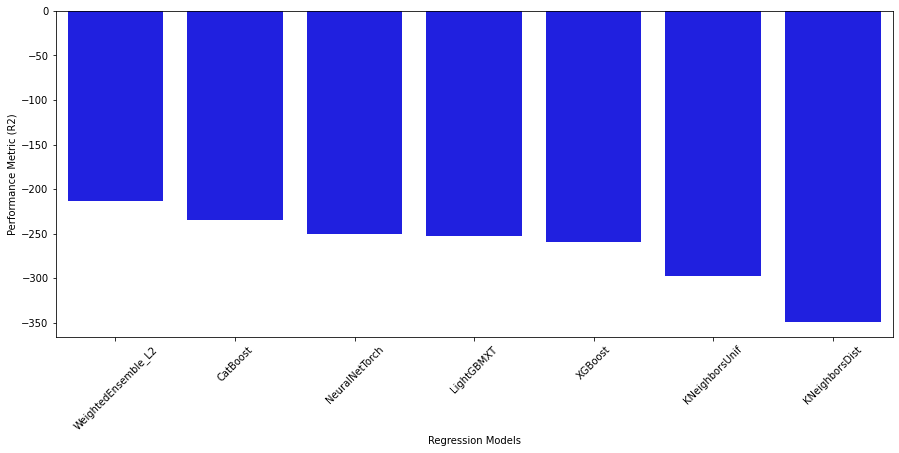

In [29]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize = (15, 6))
sns.barplot(x = "model", y = "score_val", data = predictor.leaderboard(), color = "b")
ax.set(ylabel = "Performance Metric (R2)", xlabel = "Regression Models")
plt.xticks(rotation = 45);


In [30]:
predictor.evaluate(X_test)

Evaluation: root_mean_squared_error on test data: -268.7516133876756
	Note: Scores are always higher_is_better. This metric score can be multiplied by -1 to get the metric value.
Evaluations on test data:
{
    "root_mean_squared_error": -268.7516133876756,
    "mean_squared_error": -72227.42969847866,
    "mean_absolute_error": -184.5079874570678,
    "r2": 0.8633097639236522,
    "pearsonr": 0.9351797606059893,
    "median_absolute_error": -132.99545288085938
}


{'root_mean_squared_error': -268.7516133876756,
 'mean_squared_error': -72227.42969847866,
 'mean_absolute_error': -184.5079874570678,
 'r2': 0.8633097639236522,
 'pearsonr': 0.9351797606059893,
 'median_absolute_error': -132.99545288085938}

In [31]:
# assess model performance
# Pick 5 test datasets and generate predictions
y_pred = predictor.predict(X_test)
print("Predictions:  ", list(y_pred)[:])

Predictions:   [1967.077392578125, 860.0335693359375, 220.70863342285156, 86.22012329101562, 214.9205322265625, 135.99725341796875, 443.9124450683594, 526.55322265625, 2066.418701171875, 124.82957458496094, 82.2516860961914, 193.41824340820312, 208.1071319580078, 827.7144775390625, 896.74951171875, 742.5975341796875, 1072.1737060546875, 1712.32568359375, 130.09567260742188, 343.1914978027344, 1139.607666015625, 516.1763305664062, 394.783203125, 1877.643798828125, 246.59799194335938, 2175.45654296875, 764.3869018554688, 845.1571044921875, 2202.265625, 2581.31201171875, 183.91232299804688, 836.6719970703125, 414.28314208984375, 2067.614501953125, 422.7510070800781, 651.8116455078125, 995.8870849609375, 1950.48974609375, 403.8605651855469, 213.80267333984375, 2293.0869140625, 496.13287353515625, 728.18603515625, 300.0950927734375, 1031.188720703125, 929.5203857421875, 211.79263305664062, 1489.501953125, 611.1921997070312, 723.614990234375, 1852.9129638671875, 963.2962036132812, 623.718078

In [32]:
y_test = X_test['casual']
y_test

196    2418
187     754
14      222
31       47
390     244
       ... 
566     747
688     449
266    1776
504    3410
239    1415
Name: casual, Length: 147, dtype: int64

Text(0, 0.5, 'True Values')

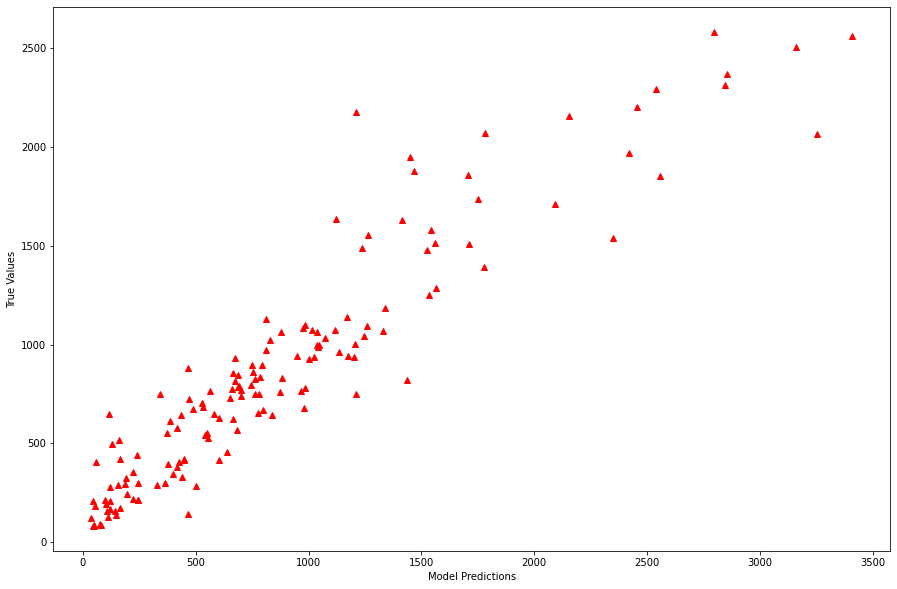

In [33]:
y_predict = predictor.predict(X_test)
plt.figure(figsize = (15, 10))
plt.plot(y_test, y_predict, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')


In [34]:
k = X_test.shape[1]
n = len(X_test)
n

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)),'.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

RMSE = 268.752 
MSE = 72227.42969847866 
MAE = 184.5079874570678 
R2 = 0.8633097639236522 
Adjusted R2 = 0.8521720409840979


# EXCELLENT JOB